In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, \
                            recall_score, roc_curve, roc_auc_score
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [46]:
mpl.rcParams['figure.figsize'] = (12, 10)

In [47]:
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [48]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [49]:
neg, pos = df['Class'].value_counts().tolist()
total = neg + pos
print(f'Total numbers: {total}\nPositive numbers/ratio: {pos} ({pos / total * 100:.3f}%)')

Total numbers: 284807
Positive numbers/ratio: 492 (0.173%)


In [50]:
# change to hours of the day
df_cp = df.copy()
df_cp.loc[:, 'Time'] = df_cp.loc[:, 'Time'].apply(lambda t: t / 3600 % 24)
df_cp

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,23.996111,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,23.996389,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,23.996667,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,23.996667,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [51]:
# log scale
eps = 0.001
df_cp['Amount'] = np.log(df_cp.pop('Amount') + eps)
df_cp.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008105
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.989913
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.936641
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.816249
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.248367


<Axes: ylabel='Frequency'>

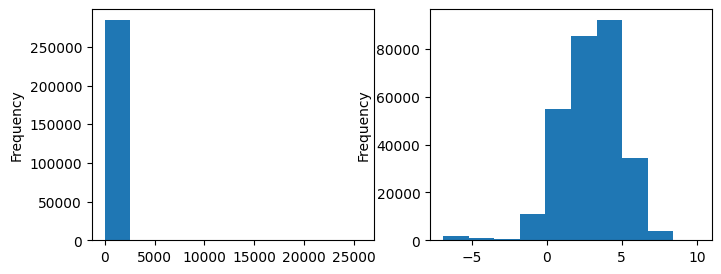

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
df['Amount'].plot(kind='hist', ax=ax1)
df_cp['Amount'].plot(kind='hist', ax=ax2)

In [53]:
labels = df_cp.pop('Class').values
labels

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
features = df_cp.values
features.shape

(284807, 30)

In [60]:
Counter(labels)

Counter({0: 284315, 1: 492})

<Axes: ylabel='count'>

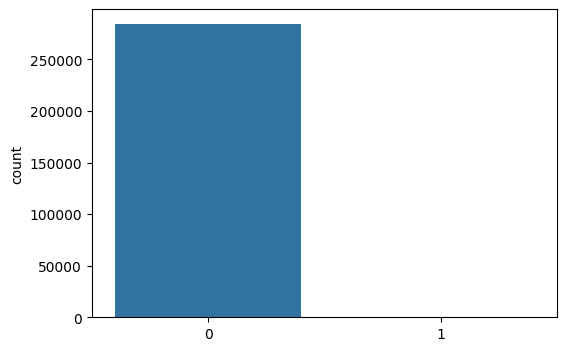

In [64]:
plt.figure(figsize=(6, 4))
sns.countplot(x=labels)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=42, stratify=labels)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142403, 30), (142404, 30), (142403,), (142404,))

In [84]:
Counter(labels), Counter(y_train), Counter(y_test)

(Counter({0: 284315, 1: 492}),
 Counter({0: 142157, 1: 246}),
 Counter({0: 142158, 1: 246}))

In [85]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [98]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [99]:
lr.predict_proba(X_test)

array([[9.99607027e-01, 3.92972562e-04],
       [9.99868457e-01, 1.31542798e-04],
       [9.94913129e-01, 5.08687059e-03],
       ...,
       [9.99907586e-01, 9.24136278e-05],
       [9.99877692e-01, 1.22308427e-04],
       [9.97472646e-01, 2.52735442e-03]])

In [100]:
y_pred_prob = lr.predict_proba(X_test)[:, 1]
y_pred_prob

array([3.92972562e-04, 1.31542798e-04, 5.08687059e-03, ...,
       9.24136278e-05, 1.22308427e-04, 2.52735442e-03])

In [101]:
threshold = 0.5
y_pred = y_pred_prob > threshold
sum(y_test), sum(y_pred), accuracy_score(y_test, y_pred)

(246, 179, 0.9992064829639616)

In [131]:
def plot_cm(y_test, y_pred_proba, threshold):
    y_pred = y_pred_proba > threshold
    cm = confusion_matrix(y_test, y_pred)
    print('f1 score:', f1_score(y_test, y_pred))
    print('accuracy:', accuracy_score(y_test, y_pred))
    print('precision:', precision_score(y_test, y_pred))
    print('recall:', recall_score(y_test, y_pred))

    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion matrix (threshold > {threshold:.2f})')
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')

f1 score: 0.7341176470588237
accuracy: 0.9992064829639616
precision: 0.8715083798882681
recall: 0.6341463414634146


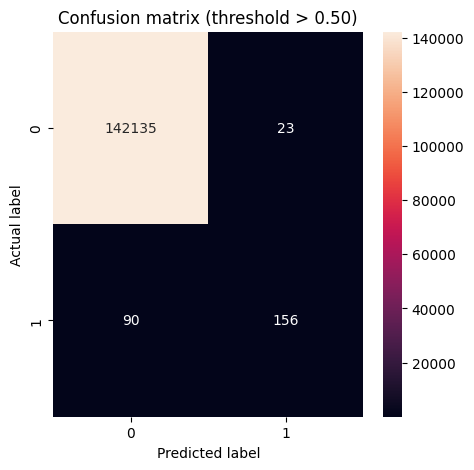

In [132]:
plot_cm(y_test, y_pred_prob, 0.5)

f1 score: 0.7494646680942185
accuracy: 0.9991783938653409
precision: 0.7918552036199095
recall: 0.7113821138211383


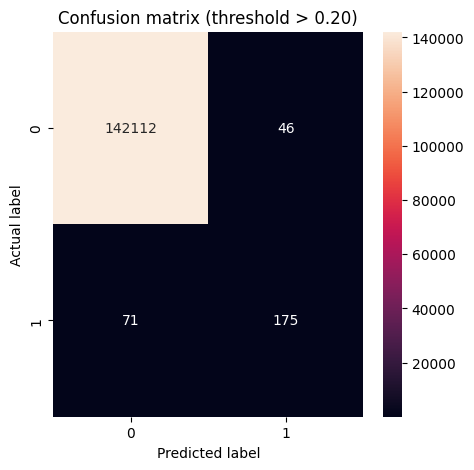

In [133]:
plot_cm(y_test, y_pred_prob, 0.2)

In [105]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [106]:
over_sampler = RandomOverSampler(sampling_strategy=0.1)
X, y = over_sampler.fit_resample(X_train, y_train)
X_train.shape, y_train.shape, X.shape, y.shape, Counter(y)

((142403, 30),
 (142403,),
 (156372, 30),
 (156372,),
 Counter({0: 142157, 1: 14215}))

In [107]:
under_sampler = RandomUnderSampler(sampling_strategy=0.5)
X, y = under_sampler.fit_resample(X, y)
X.shape, y.shape, Counter(y)

((42645, 30), (42645,), Counter({0: 28430, 1: 14215}))

<Axes: ylabel='count'>

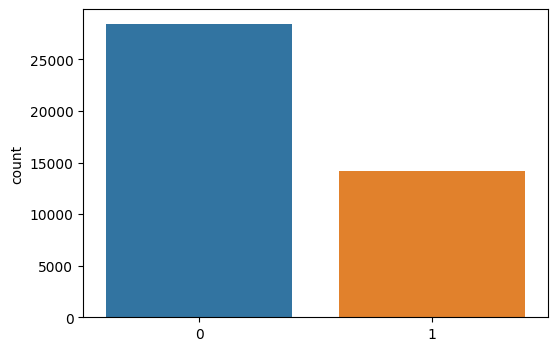

In [108]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y)

In [110]:
re_lr = LogisticRegression(max_iter=1000, random_state=42)
re_lr.fit(X, y)

LogisticRegression(max_iter=1000, random_state=42)

In [111]:
y_pred_proba = re_lr.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.06501346, 0.01584437, 0.31707877, ..., 0.00110753, 0.20572286,
       0.33140529])

In [112]:
y_pred = y_pred_proba > 0.5
sum(y_test), sum(y_pred), accuracy_score(y_test, y_pred)

(246, 1916, 0.987879553945114)

f1 score: 0.20166512488436636
accuracy: 0.987879553945114
precision: 0.11377870563674322
recall: 0.8861788617886179


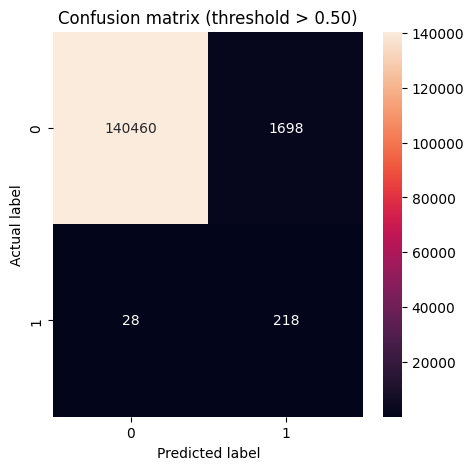

In [113]:
plot_cm(y_test, y_pred_proba, 0.5)

In [114]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=12, min_samples_leaf=50,
                            min_samples_split=6, n_jobs=-1, verbose=1)
rf.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.1s finished


RandomForestClassifier(max_depth=12, min_samples_leaf=50, min_samples_split=6,
                       n_estimators=1000, n_jobs=-1, verbose=1)

In [115]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]
y_pred = y_pred_proba > 0.5

sum(y_test), sum(y_pred), accuracy_score(y_test, y_pred)

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    0.2s
[Parallel(n_jobs=24)]: Done 402 tasks      | elapsed:    0.5s
[Parallel(n_jobs=24)]: Done 752 tasks      | elapsed:    0.9s
[Parallel(n_jobs=24)]: Done 1000 out of 1000 | elapsed:    1.2s finished


(246, 332, 0.998876436055167)

f1 score: 0.7231833910034603
accuracy: 0.998876436055167
precision: 0.6295180722891566
recall: 0.8495934959349594


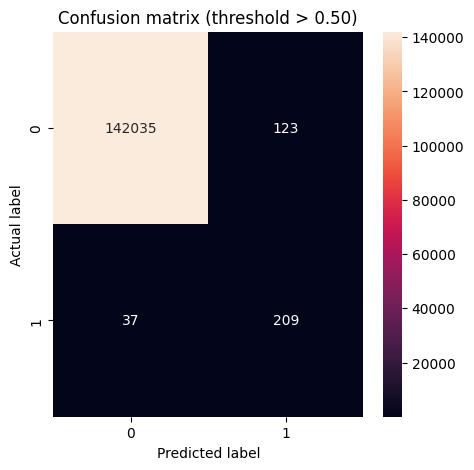

In [116]:
plot_cm(y_test, y_pred_proba, 0.5)

In [117]:
knn = KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

In [118]:
%%time
y_pred_proba = knn.predict_proba(X_test)[:, 1]
y_pred = knn.predict(X_test)

sum(y_test), sum(y_pred), sum(y_test == y_pred) / len(y_test)

CPU times: user 2min 11s, sys: 0 ns, total: 2min 11s
Wall time: 12.7 s


(246, 1029, 0.9939538215218674)

f1 score: 0.3247058823529412
accuracy: 0.9939538215218674
precision: 0.20116618075801748
recall: 0.8414634146341463


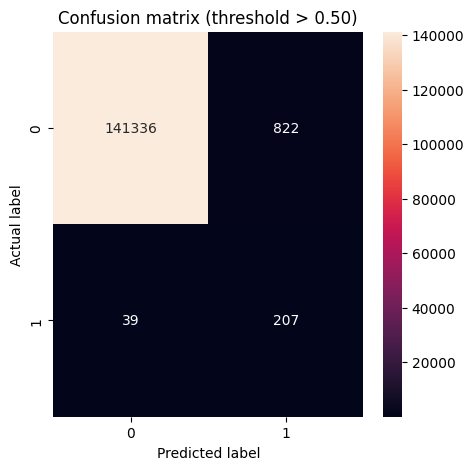

In [119]:
plot_cm(y_test, y_pred_proba, 0.5)

In [122]:
def plot_roc(name, labels, predictions, **kwargs):
    fpr, tpr, _ = roc_curve(labels, predictions)
    auc = roc_auc_score(labels, predictions)

    plt.plot(100*fpr, 100*tpr, label=f'{name}={auc:.5f}', linewidth=2, **kwargs)
    plt.title('ROC Curve')
    plt.xlabel('FPR [%]')
    plt.ylabel('TPR [%]')
    plt.xlim([-0.5, 40])
    plt.ylim([80, 100.5])
    fig = plt.gcf()
    fig.set_size_inches(8, 6)
    plt.legend(loc='lower right')

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    0.4s
[Parallel(n_jobs=24)]: Done 402 tasks      | elapsed:    0.8s
[Parallel(n_jobs=24)]: Done 752 tasks      | elapsed:    1.3s
[Parallel(n_jobs=24)]: Done 1000 out of 1000 | elapsed:    1.7s finished


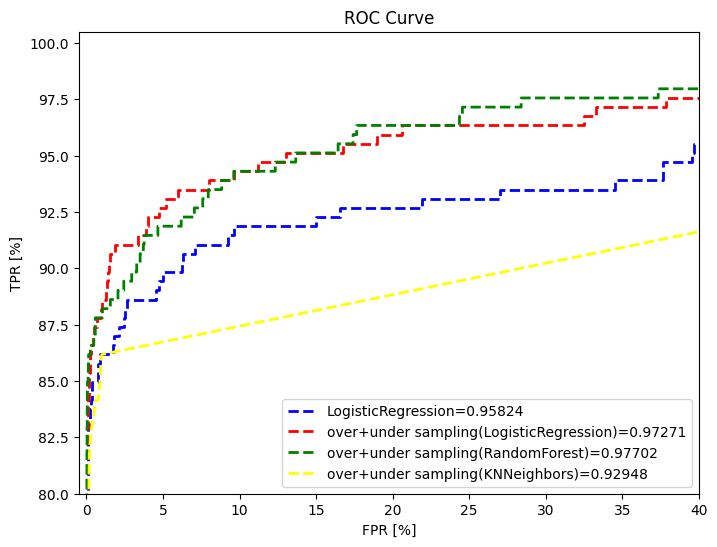

In [124]:
y_pred_proba = lr.predict_proba(X_test)[:, 1]
plot_roc('LogisticRegression', y_test, y_pred_proba, color='blue', linestyle='--')

y_pred_proba = re_lr.predict_proba(X_test)[:, 1]
plot_roc('over+under sampling(LogisticRegression)', y_test, y_pred_proba, color='red', linestyle='--')

y_pred_proba = rf.predict_proba(X_test)[:, 1]
plot_roc('over+under sampling(RandomForest)', y_test, y_pred_proba, color='green', linestyle='--')

y_pred_proba = knn.predict_proba(X_test)[:, 1]
plot_roc('over+under sampling(KNNeighbors)', y_test, y_pred_proba, color='yellow', linestyle='--')

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    0.3s
[Parallel(n_jobs=24)]: Done 402 tasks      | elapsed:    0.6s
[Parallel(n_jobs=24)]: Done 752 tasks      | elapsed:    1.0s
[Parallel(n_jobs=24)]: Done 1000 out of 1000 | elapsed:    1.3s finished


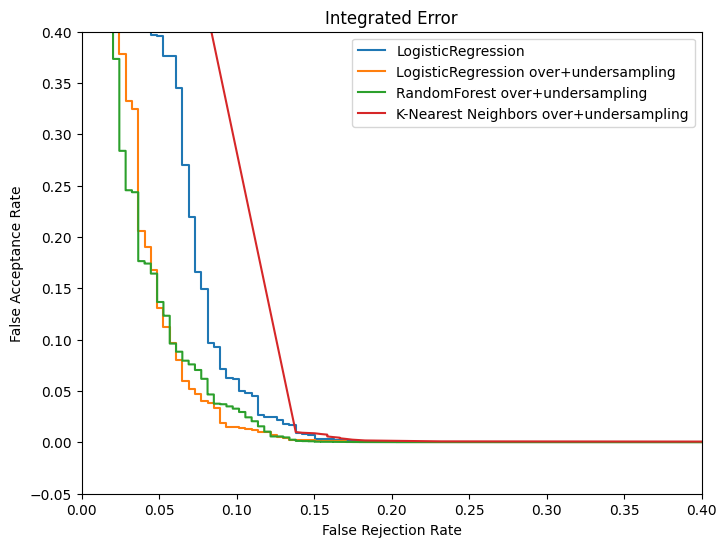

In [125]:
## IE (Integrated Error)
# FRR = FNR: False Rejection Rate = FN/(FN + TN)  
# FAR = FPR: False Acceptance Rate = FP/(FP + FN)

plt.figure(figsize=(8, 6))

y_pred_proba = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
fnr = 1 - tpr
plt.plot(fnr, fpr, label='LogisticRegression')

y_pred_proba = re_lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
fnr = 1 - tpr
plt.plot(fnr, fpr, label='LogisticRegression over+undersampling')

y_pred_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
fnr = 1 - tpr
plt.plot(fnr, fpr, label='RandomForest over+undersampling')

y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
fnr = 1 - tpr
plt.plot(fnr, fpr, label='K-Nearest Neighbors over+undersampling')

plt.title('Integrated Error')
plt.xlabel('False Rejection Rate')
plt.ylabel('False Acceptance Rate')
plt.xlim([0, 0.4])
plt.ylim([-0.05, 0.4])
plt.legend()